# Learned ski rental with ML advice

### setup:
pip3 install numpy pandas keras tensorflow

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [6]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "./input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# For random number generation
from random import randint
from numpy import array
from numpy import argmax
from pandas import concat
from pandas import DataFrame
# For LSTM bring Keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import math

import matplotlib.pyplot as plt

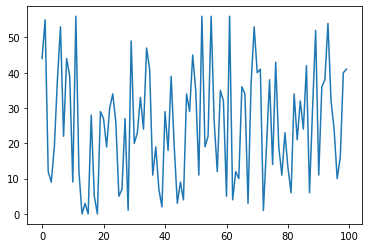

In [64]:
# Building the dataset
sequence_length = 100
ski_price = randint(20,100)

def generate_sequence(length = sequence_length):
    return [randint(0, 2 * ski_price) for _ in range(length)]

sequence = generate_sequence()
plt.plot(sequence)
plt.show()

In [65]:
# split into train and test sets
train_size = int(len(sequence) * 0.75)
test_size = len(sequence) - train_size
train, test = sequence[0:train_size], sequence[train_size:len(sequence)]

In [66]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=10):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# reshape into X={t} and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

testX, testY = create_dataset(test, look_back)
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [67]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
64/64 - 2s - loss: 804.1541 - 2s/epoch - 31ms/step
Epoch 2/100
64/64 - 0s - loss: 800.9955 - 157ms/epoch - 2ms/step
Epoch 3/100
64/64 - 0s - loss: 797.8170 - 110ms/epoch - 2ms/step
Epoch 4/100
64/64 - 0s - loss: 794.9513 - 130ms/epoch - 2ms/step
Epoch 5/100
64/64 - 0s - loss: 792.2286 - 176ms/epoch - 3ms/step
Epoch 6/100
64/64 - 0s - loss: 789.4097 - 91ms/epoch - 1ms/step
Epoch 7/100
64/64 - 0s - loss: 786.6415 - 94ms/epoch - 1ms/step
Epoch 8/100
64/64 - 0s - loss: 784.1044 - 96ms/epoch - 1ms/step
Epoch 9/100
64/64 - 0s - loss: 781.6686 - 97ms/epoch - 2ms/step
Epoch 10/100
64/64 - 0s - loss: 779.1735 - 101ms/epoch - 2ms/step
Epoch 11/100
64/64 - 0s - loss: 776.7383 - 87ms/epoch - 1ms/step
Epoch 12/100
64/64 - 0s - loss: 773.8082 - 86ms/epoch - 1ms/step
Epoch 13/100
64/64 - 0s - loss: 770.1076 - 83ms/epoch - 1ms/step
Epoch 14/100
64/64 - 0s - loss: 767.4359 - 92ms/epoch - 1ms/step
Epoch 15/100
64/64 - 0s - loss: 764.6486 - 86ms/epoch - 1ms/step
Epoch 16/100
64/64 - 0s - loss

In [68]:
#trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(testPredict.shape)
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
for _ in testPredict:
    print(_[0])
#print(trainPredict[:][0])

(14, 1)
8.043371
8.042846
8.043371
6.911461
8.043371
8.043371
8.043371
8.043371
8.043371
8.043371
8.034403
8.043371
8.043371
8.043371


In [3]:
sequence_length = 100
ski_price = randint(20,100)
#path_length = 1000
training_coeff = 2000



def one_hot_encode(sequence, n_unique = 2 * path_length):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_unique)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def generate_data():
    sequence = generate_sequence() # generate sequence
    encoded = one_hot_encode(sequence) # one hot encode
    df = DataFrame(encoded) 
    df = concat([df.shift(4), df.shift(3), df.shift(2), df.shift(1), df], axis=1) # create lag inputs
    values = df.values
    values = values[5:,:] # remove non-viable rows    
    X = values.reshape(len(values), 5, 2 * path_length) # convert to 3d for input
    y = encoded[4:-1,:] # drop last value from y
    return X, y




# define model
model = Sequential()
model.add(LSTM(50, batch_input_shape=(5, 5, 2 * path_length), stateful=True))
model.add(Dense(2 * path_length, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


def competitive_ratio_ml(expected, predicted, ski_price):
    comp_ratio = []
    for i in range(0, len(predicted)):
        if (predicted[i] > ski_price and expected[i] > ski_price):
            comp_ratio.append(1)
        elif (predicted[i] < ski_price and expected[i] < ski_price):
            comp_ratio.append(1)
        elif (predicted[i] > ski_price and expected[i] < ski_price):
            comp_ratio.append(ski_price / expected[i])
        elif (predicted[i] < ski_price and expected[i] > ski_price):
            comp_ratio.append(expected[i] / ski_price)
    return comp_ratio

def competitive_ratio_traditional(expected, ski_price):
    comp_ratio = []
    for i in range(0, len(expected)):
        if (expected[i] <= ski_price):
            comp_ratio.append(1)
        else:
            comp_ratio.append(2 - 1/ski_price)
    return comp_ratio

def competitive_ratio_ml_trust(expected, predicted, ski_price):
    sigma = 0.1
    comp_ratio = []
    for i in range(0, len(predicted)):
        if (predicted[i] > ski_price and expected[i] > ski_price):
            comp_ratio.append((math.ceil(predicted[i] * sigma) - 1 + ski_price) / ski_price)
        elif (predicted[i] < ski_price and expected[i] < ski_price):
            comp_ratio.append(1)
        elif (predicted[i] > ski_price and expected[i] < ski_price):
            if (expected[i] < predicted[i] * sigma):
                comp_ratio.append(1)
            else:
                comp_ratio.append((ski_price + math.ceil(predicted[i] * sigma) - 1) / expected[i])
        elif (predicted[i] < ski_price and expected[i] > ski_price):
            if ((predicted[i] / sigma) < expected[i]):
                comp_ratio.append((math.floor(predicted[i] / sigma) - 1 + ski_price) / ski_price)
            else:
                comp_ratio.append(expected[i] / ski_price)
    return comp_ratio

#train model
for i in range(training_coeff):
    X, y = generate_data()
    model.fit(X, y, epochs=1, batch_size=5, verbose=2, shuffle=False)
    model.reset_states()

# evaluate model on new data
X, y = generate_data()
yhat = model.predict(X, batch_size=5)
print('ski price: %s' % ski_price)
print('Expected:  %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

expected = one_hot_decode(y)
predicted = one_hot_decode(yhat)
print(competitive_ratio_ml(expected, predicted, ski_price))

expected = one_hot_decode(y)
predicted = one_hot_decode(yhat)
print(competitive_ratio_traditional(expected, ski_price))

expected = one_hot_decode(y)
predicted = one_hot_decode(yhat)
print(competitive_ratio_ml_trust(expected, predicted, ski_price))

**Cow path problem**

In [ ]:
sequence_length = 25
path_length = 1000
training_coeff = 500
def generate_sequence(length = sequence_length):
    return [randint(0, 2 * path_length -1) for _ in range(length)]

def one_hot_encode(sequence, n_unique = 2 * path_length):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_unique)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def generate_data():
    # generate sequence
    sequence = generate_sequence()
    # one hot encode
    encoded = one_hot_encode(sequence)
    # create lag inputs
    df = DataFrame(encoded)
    df = concat([df.shift(4), df.shift(3), df.shift(2), df.shift(1), df], axis=1)
    # remove non-viable rows
    values = df.values
    values = values[5:,:]
    # convert to 3d for input
    X = values.reshape(len(values), 5, 2 * path_length)
    # drop last value from y
    y = encoded[4:-1,:]
    return X, y

# define model
model = Sequential()
model.add(LSTM(50, batch_input_shape=(5, 5, 2 * path_length), stateful=True))
model.add(Dense(2 * path_length, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [ ]:
def comp_ratio_ML(expected,predicted):
    comp_ratio = []
    for i in range(0, len(predicted)):
        if (predicted[i] > 0 and expected[i] > 0):
            if predicted[i] > expected[i]:
                comp_ratio.append(1) #comp_ratio += 1
            else:
                x = predicted[i]
                traveled_distance = 0
                while(x < expected[i]):
                    traveled_distance += 2 * x + 2 * 2 * x
                    x = 4 * x
                traveled_distance = traveled_distance + expected[i]
                comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
        elif (predicted[i] < 0 and expected[i] < 0):
            if predicted[i] < expected[i]:
                comp_ratio.append(1) #comp_ratio += 1
            else:
                predicted[i] = abs(predicted[i])
                expected[i] = abs(expected[i])
                x = predicted[i]
                traveled_distance = 0
                while(x < expected[i]):
                    traveled_distance += 2 * x + 2 * 2 * x
                    x = 4 * x
                traveled_distance = traveled_distance + expected[i]
                comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
        elif (predicted[i] > 0 and expected[i] < 0):
            expected[i] = abs(expected[i])
            x = predicted[i]
            traveled_distance = 2 * x
            x = 2 * predicted[i]
            while(x < expected[i]):
                traveled_distance += 2 * x + 2 * 2 * x
                x = 4 * x
            traveled_distance = traveled_distance + expected[i]
            comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
        elif (predicted[i] < 0 and expected[i] > 0):
            predicted[i] = abs(predicted[i])
            x = predicted[i]
            traveled_distance = 2 * x
            x = 2 * predicted[i]
            while(x < expected[i]):
                traveled_distance += 2 * x + 2 * 2 * x
                x = 4 * x
            traveled_distance = traveled_distance + expected[i]
            comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
    return comp_ratio
        
def comp_ratio_conventional(expected):
    comp_ratio = []
    for i in range(0, len(expected)):
        if expected[i] > 0:
            x = 1
            traveled_distance = 0
            while (x < expected[i]):
                traveled_distance += 2 * x + 2 * 2 * x
                x = 4 * x
            traveled_distance = traveled_distance + expected[i]
            comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
        else:
            expected[i] = abs(expected[i])
            x = 2
            traveled_distance = 2
            while (x < expected[i]):
                traveled_distance += 2 * x + 2 * 2 * x
                x = 4 * x
            traveled_distance = traveled_distance + expected[i]
            comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
    return comp_ratio

def comp_ratio_experimental(expected, predicted):
    comp_ratio = []
    for i in range(0, len(predicted)):
        if (predicted[i] > 0 and expected[i] > 0):
            if predicted[i] > expected[i]:
                comp_ratio.append(1) #comp_ratio += 1
            else:
                x = predicted[i]
                traveled_distance = 0
                while(x < expected[i]):
                    traveled_distance += 2 * x + 2 * x
                    x = 2 * x
                traveled_distance = traveled_distance + expected[i]
                comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
        elif (predicted[i] < 0 and expected[i] < 0):
            if predicted[i] < expected[i]:
                comp_ratio.append(1) #comp_ratio += 1
            else:
                predicted[i] = abs(predicted[i])
                expected[i] = abs(expected[i])
                x = predicted[i]
                traveled_distance = 0
                while(x < expected[i]):
                    traveled_distance += 2 * x + 2 * x
                    x = 2 * x
                traveled_distance = traveled_distance + expected[i]
                comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
        elif (predicted[i] > 0 and expected[i] < 0):
            expected[i] = abs(expected[i])
            x = predicted[i]
            traveled_distance = 2 * x
            x = 2 * predicted[i]
            while(x < expected[i]):
                traveled_distance += 2 * x + 2 * x
                x = 2 * x
            traveled_distance = traveled_distance + expected[i]
            comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
        elif (predicted[i] < 0 and expected[i] > 0):
            predicted[i] = abs(predicted[i])
            x = predicted[i]
            traveled_distance = 2 * x
            x = 2 * predicted[i]
            while(x < expected[i]):
                traveled_distance += 2 * x + 2 * x
                x = 2 * x
            traveled_distance = traveled_distance + expected[i]
            comp_ratio.append(traveled_distance / expected[i]) #comp_ratio += traveled_distance / expected[i]
    return comp_ratio

def comp_ratio_trust(expected, predicted):
    comp_ratio = 0
    for i in range(0, len(predicted)):
        if (predicted[i] > 0 and expected[i] > 0):
            if predicted[i] > expected[i]:
                comp_ratio += 1
            else:
                x = predicted[i] / sigma
                traveled_distance = 0
                while(x < expected[i]):
                    traveled_distance += 2 * x + 4 * x * sigma * sigma
                    x = 4 * x
                traveled_distance = traveled_distance + expected[i]
                comp_ratio += traveled_distance / expected[i]
        elif (predicted[i] < 0 and expected[i] < 0):
            if predicted[i] < expected[i]:
                comp_ratio += 1
            else:
                predicted[i] = abs(predicted[i])
                expected[i] = abs(expected[i])
                x = predicted[i] / sigma
                traveled_distance = 0
                while(x < expected[i]):
                    traveled_distance += 2 * x + 4 * x * sigma * sigma
                    x = 4 * x
                traveled_distance = traveled_distance + expected[i]
                comp_ratio += traveled_distance / expected[i]
        elif (predicted[i] > 0 and expected[i] < 0):
            expected[i] = abs(expected[i])
            x = predicted[i]
            traveled_distance = 2 * x / sigma
            x = 2 * predicted[i] * sigma
            while(x < expected[i]):
                traveled_distance += 2 * x + 2 * x / sigma / sigma
                x = 4 * x
            traveled_distance = traveled_distance + expected[i]
            comp_ratio += traveled_distance / expected[i]
        elif (predicted[i] < 0 and expected[i] > 0):
            predicted[i] = abs(predicted[i])
            x = predicted[i] 
            traveled_distance = 2 * x / sigma
            x = 2 * predicted[i] * sigma
            while(x < expected[i]):
                traveled_distance += 2 * x + 2 * x / sigma / sigma
                x = 4 * x
            traveled_distance = traveled_distance + expected[i]
            comp_ratio += traveled_distance / expected[i]
    return comp_ratio / len(expected)

In [ ]:
#train model
for i in range(training_coeff):
    X, y = generate_data()
    model.fit(X, y, epochs=1, batch_size=5, verbose=2, shuffle=False)
    model.reset_states()

# evaluate model on new data
X, y = generate_data()
yhat = model.predict(X, batch_size=5)
print('Expected:  %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

In [ ]:
#competitive ratio analysis
expected = one_hot_decode(y)
predicted = one_hot_decode(yhat)

expected = [_ - path_length for _ in expected]
predicted = [_ - path_length for _ in predicted]
print(expected)
print(predicted)
comp_ratio_ML = comp_ratio_ML(expected,predicted)
print(comp_ratio_ML)


#competitive ratio analysis
expected = one_hot_decode(y)
predicted = one_hot_decode(yhat)

expected = [_ - path_length for _ in expected]
predicted = [_ - path_length for _ in predicted]
print(expected)
print(predicted)
print("average competitive ratio without ML", comp_ratio_conventional(expected))


#competitive ratio analysis with huge trust
expected = one_hot_decode(y)
predicted = one_hot_decode(yhat)

expected = [_ - path_length for _ in expected]
predicted = [_ - path_length for _ in predicted]
print(expected)
print(predicted)
print("average competitive ratio", comp_ratio_experimental(expected, predicted))


#competitive ratio analysis with trust factor
#expected = one_hot_decode(y)
#predicted = one_hot_decode(yhat)

#sigma = 0.5
#expected = [_ - path_length for _ in expected]
#predicted = [_ - path_length for _ in predicted]
#print(expected)
#print(predicted)
#print("average competitive ratio", comp_ratio_trust(expected, predicted))

**Ski-Rental problem**

In [4]:
sequence_length = 105
ski_price = randint(20,100)
path_length = 1000
training_coeff = 2000
def generate_sequence(length = sequence_length):
    return [randint(0, 2 * ski_price) for _ in range(length)]

def one_hot_encode(sequence, n_unique = 2 * path_length):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_unique)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def generate_data():
    # generate sequence
    sequence = generate_sequence()
    # one hot encode
    encoded = one_hot_encode(sequence)
    # create lag inputs
    df = DataFrame(encoded)
    df = concat([df.shift(4), df.shift(3), df.shift(2), df.shift(1), df], axis=1)
    # remove non-viable rows
    values = df.values
    values = values[5:,:]
    # convert to 3d for input
    X = values.reshape(len(values), 5, 2 * path_length)
    # drop last value from y
    y = encoded[4:-1,:]
    return X, y

# define model
model = Sequential()
model.add(LSTM(50, batch_input_shape=(5, 5, 2 * path_length), stateful=True))
model.add(Dense(2 * path_length, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


def competitive_ratio_ml(expected, predicted, ski_price):
    comp_ratio = []
    for i in range(0, len(predicted)):
        if (predicted[i] > ski_price and expected[i] > ski_price):
            comp_ratio.append(1)
        elif (predicted[i] < ski_price and expected[i] < ski_price):
            comp_ratio.append(1)
        elif (predicted[i] > ski_price and expected[i] < ski_price):
            comp_ratio.append(ski_price / expected[i])
        elif (predicted[i] < ski_price and expected[i] > ski_price):
            comp_ratio.append(expected[i] / ski_price)
    return comp_ratio

def competitive_ratio_traditional(expected, ski_price):
    comp_ratio = []
    for i in range(0, len(expected)):
        if (expected[i] <= ski_price):
            comp_ratio.append(1)
        else:
            comp_ratio.append(2 - 1/ski_price)
    return comp_ratio

def competitive_ratio_ml_trust(expected, predicted, ski_price):
    sigma = 0.1
    comp_ratio = []
    for i in range(0, len(predicted)):
        if (predicted[i] > ski_price and expected[i] > ski_price):
            comp_ratio.append((math.ceil(predicted[i] * sigma) - 1 + ski_price) / ski_price)
        elif (predicted[i] < ski_price and expected[i] < ski_price):
            comp_ratio.append(1)
        elif (predicted[i] > ski_price and expected[i] < ski_price):
            if (expected[i] < predicted[i] * sigma):
                comp_ratio.append(1)
            else:
                comp_ratio.append((ski_price + math.ceil(predicted[i] * sigma) - 1) / expected[i])
        elif (predicted[i] < ski_price and expected[i] > ski_price):
            if ((predicted[i] / sigma) < expected[i]):
                comp_ratio.append((math.floor(predicted[i] / sigma) - 1 + ski_price) / ski_price)
            else:
                comp_ratio.append(expected[i] / ski_price)
    return comp_ratio

#train model
for i in range(training_coeff):
    X, y = generate_data()
    model.fit(X, y, epochs=1, batch_size=5, verbose=2, shuffle=False)
    model.reset_states()

# evaluate model on new data
X, y = generate_data()
yhat = model.predict(X, batch_size=5)
print('ski price: %s' % ski_price)
print('Expected:  %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

expected = one_hot_decode(y)
predicted = one_hot_decode(yhat)
print(competitive_ratio_ml(expected, predicted, ski_price))

expected = one_hot_decode(y)
predicted = one_hot_decode(yhat)
print(competitive_ratio_traditional(expected, ski_price))

expected = one_hot_decode(y)
predicted = one_hot_decode(yhat)
print(competitive_ratio_ml_trust(expected, predicted, ski_price))

20/20 - 0s - loss: 7.5933 - acc: 0.0200
20/20 - 0s - loss: 7.5007 - acc: 0.0300
20/20 - 0s - loss: 6.3343 - acc: 0.0200
20/20 - 0s - loss: 5.1382 - acc: 0.0000e+00
20/20 - 0s - loss: 4.5686 - acc: 0.0000e+00
20/20 - 0s - loss: 4.3713 - acc: 0.0400
20/20 - 0s - loss: 4.4366 - acc: 0.0000e+00
20/20 - 0s - loss: 4.2918 - acc: 0.0100
20/20 - 0s - loss: 4.3755 - acc: 0.0100
20/20 - 0s - loss: 4.2109 - acc: 0.0600
20/20 - 0s - loss: 4.1714 - acc: 0.0400
20/20 - 0s - loss: 4.2906 - acc: 0.0500
20/20 - 0s - loss: 4.2849 - acc: 0.0100
20/20 - 0s - loss: 4.1543 - acc: 0.0400
20/20 - 0s - loss: 4.1862 - acc: 0.0400
20/20 - 0s - loss: 4.2300 - acc: 0.0100
20/20 - 0s - loss: 4.2807 - acc: 0.0100
20/20 - 0s - loss: 4.2162 - acc: 0.0000e+00
20/20 - 0s - loss: 4.1910 - acc: 0.0300
20/20 - 0s - loss: 4.2493 - acc: 0.0000e+00
20/20 - 0s - loss: 4.1500 - acc: 0.0000e+00
20/20 - 0s - loss: 4.2029 - acc: 0.0200
20/20 - 0s - loss: 4.2271 - acc: 0.0100
20/20 - 0s - loss: 4.2305 - acc: 0.0100
20/20 - 0s - los

20/20 - 0s - loss: 4.1533 - acc: 0.0000e+00
20/20 - 0s - loss: 4.1803 - acc: 0.0300
20/20 - 0s - loss: 4.1821 - acc: 0.0100
20/20 - 0s - loss: 4.1362 - acc: 0.0100
20/20 - 0s - loss: 4.1382 - acc: 0.0200
20/20 - 0s - loss: 4.1459 - acc: 0.0000e+00
20/20 - 0s - loss: 4.1042 - acc: 0.0200
20/20 - 0s - loss: 4.1759 - acc: 0.0200
20/20 - 0s - loss: 4.1425 - acc: 0.0200
20/20 - 0s - loss: 4.1586 - acc: 0.0000e+00
20/20 - 0s - loss: 4.1594 - acc: 0.0100
20/20 - 0s - loss: 4.1638 - acc: 0.0100
20/20 - 0s - loss: 4.1219 - acc: 0.0300
20/20 - 0s - loss: 4.1429 - acc: 0.0500
20/20 - 0s - loss: 4.1330 - acc: 0.0000e+00
20/20 - 0s - loss: 4.1260 - acc: 0.0400
20/20 - 0s - loss: 4.1700 - acc: 0.0300
20/20 - 0s - loss: 4.1082 - acc: 0.0700
20/20 - 0s - loss: 4.1712 - acc: 0.0100
20/20 - 0s - loss: 4.1410 - acc: 0.0100
20/20 - 0s - loss: 4.1119 - acc: 0.0200
20/20 - 0s - loss: 4.1726 - acc: 0.0000e+00
20/20 - 0s - loss: 4.1364 - acc: 0.0200
20/20 - 0s - loss: 4.1683 - acc: 0.0400
20/20 - 0s - loss: 4

20/20 - 0s - loss: 2.2131 - acc: 0.6900
20/20 - 0s - loss: 2.1926 - acc: 0.7300
20/20 - 0s - loss: 2.1180 - acc: 0.8000
20/20 - 0s - loss: 2.0560 - acc: 0.7800
20/20 - 0s - loss: 2.0940 - acc: 0.7200
20/20 - 0s - loss: 2.0764 - acc: 0.7800
20/20 - 0s - loss: 2.0530 - acc: 0.8000
20/20 - 0s - loss: 2.1259 - acc: 0.7000
20/20 - 0s - loss: 2.0500 - acc: 0.7400
20/20 - 0s - loss: 2.0734 - acc: 0.7100
20/20 - 0s - loss: 2.0084 - acc: 0.7900
20/20 - 0s - loss: 1.9875 - acc: 0.7900
20/20 - 0s - loss: 1.9447 - acc: 0.7800
20/20 - 0s - loss: 1.9182 - acc: 0.7900
20/20 - 0s - loss: 1.9477 - acc: 0.7800
20/20 - 0s - loss: 1.9083 - acc: 0.7800
20/20 - 0s - loss: 1.9909 - acc: 0.7300
20/20 - 0s - loss: 1.9632 - acc: 0.7900
20/20 - 0s - loss: 1.9383 - acc: 0.7800
20/20 - 0s - loss: 1.8931 - acc: 0.7200
20/20 - 0s - loss: 1.8875 - acc: 0.7900
20/20 - 0s - loss: 1.9335 - acc: 0.7600
20/20 - 0s - loss: 1.8289 - acc: 0.7700
20/20 - 0s - loss: 1.8558 - acc: 0.7500
20/20 - 0s - loss: 1.8565 - acc: 0.7500


20/20 - 0s - loss: 0.4191 - acc: 1.0000
20/20 - 0s - loss: 0.4062 - acc: 1.0000
20/20 - 0s - loss: 0.4101 - acc: 0.9900
20/20 - 0s - loss: 0.4035 - acc: 1.0000
20/20 - 0s - loss: 0.4115 - acc: 1.0000
20/20 - 0s - loss: 0.4242 - acc: 1.0000
20/20 - 0s - loss: 0.3816 - acc: 1.0000
20/20 - 0s - loss: 0.3780 - acc: 1.0000
20/20 - 0s - loss: 0.3882 - acc: 1.0000
20/20 - 0s - loss: 0.4096 - acc: 1.0000
20/20 - 0s - loss: 0.3873 - acc: 1.0000
20/20 - 0s - loss: 0.3798 - acc: 1.0000
20/20 - 0s - loss: 0.3606 - acc: 1.0000
20/20 - 0s - loss: 0.3858 - acc: 1.0000
20/20 - 0s - loss: 0.3748 - acc: 1.0000
20/20 - 0s - loss: 0.3452 - acc: 1.0000
20/20 - 0s - loss: 0.3470 - acc: 1.0000
20/20 - 0s - loss: 0.3494 - acc: 1.0000
20/20 - 0s - loss: 0.3556 - acc: 1.0000
20/20 - 0s - loss: 0.3549 - acc: 1.0000
20/20 - 0s - loss: 0.3611 - acc: 1.0000
20/20 - 0s - loss: 0.3314 - acc: 1.0000
20/20 - 0s - loss: 0.3737 - acc: 1.0000
20/20 - 0s - loss: 0.3520 - acc: 1.0000
20/20 - 0s - loss: 0.3271 - acc: 1.0000


20/20 - 0s - loss: 0.0700 - acc: 1.0000
20/20 - 0s - loss: 0.0744 - acc: 1.0000
20/20 - 0s - loss: 0.0602 - acc: 1.0000
20/20 - 0s - loss: 0.0671 - acc: 1.0000
20/20 - 0s - loss: 0.0655 - acc: 1.0000
20/20 - 0s - loss: 0.0653 - acc: 1.0000
20/20 - 0s - loss: 0.0665 - acc: 1.0000
20/20 - 0s - loss: 0.0653 - acc: 1.0000
20/20 - 0s - loss: 0.0622 - acc: 1.0000
20/20 - 0s - loss: 0.0586 - acc: 1.0000
20/20 - 0s - loss: 0.0621 - acc: 1.0000
20/20 - 0s - loss: 0.0677 - acc: 1.0000
20/20 - 0s - loss: 0.0678 - acc: 1.0000
20/20 - 0s - loss: 0.0661 - acc: 1.0000
20/20 - 0s - loss: 0.0583 - acc: 1.0000
20/20 - 0s - loss: 0.0630 - acc: 1.0000
20/20 - 0s - loss: 0.0544 - acc: 1.0000
20/20 - 0s - loss: 0.0611 - acc: 1.0000
20/20 - 0s - loss: 0.0592 - acc: 1.0000
20/20 - 0s - loss: 0.0596 - acc: 1.0000
20/20 - 0s - loss: 0.0560 - acc: 1.0000
20/20 - 0s - loss: 0.0591 - acc: 1.0000
20/20 - 0s - loss: 0.0607 - acc: 1.0000
20/20 - 0s - loss: 0.0536 - acc: 1.0000
20/20 - 0s - loss: 0.0531 - acc: 1.0000


20/20 - 0s - loss: 0.0154 - acc: 1.0000
20/20 - 0s - loss: 0.0131 - acc: 1.0000
20/20 - 0s - loss: 0.0143 - acc: 1.0000
20/20 - 0s - loss: 0.0136 - acc: 1.0000
20/20 - 0s - loss: 0.0129 - acc: 1.0000
20/20 - 0s - loss: 0.0153 - acc: 1.0000
20/20 - 0s - loss: 0.0122 - acc: 1.0000
20/20 - 0s - loss: 0.0121 - acc: 1.0000
20/20 - 0s - loss: 0.0129 - acc: 1.0000
20/20 - 0s - loss: 0.0126 - acc: 1.0000
20/20 - 0s - loss: 0.0147 - acc: 1.0000
20/20 - 0s - loss: 0.0132 - acc: 1.0000
20/20 - 0s - loss: 0.0131 - acc: 1.0000
20/20 - 0s - loss: 0.0112 - acc: 1.0000
20/20 - 0s - loss: 0.0142 - acc: 1.0000
20/20 - 0s - loss: 0.0111 - acc: 1.0000
20/20 - 0s - loss: 0.0119 - acc: 1.0000
20/20 - 0s - loss: 0.0117 - acc: 1.0000
20/20 - 0s - loss: 0.0113 - acc: 1.0000
20/20 - 0s - loss: 0.0125 - acc: 1.0000
20/20 - 0s - loss: 0.0133 - acc: 1.0000
20/20 - 0s - loss: 0.0122 - acc: 1.0000
20/20 - 0s - loss: 0.0117 - acc: 1.0000
20/20 - 0s - loss: 0.0133 - acc: 1.0000
20/20 - 0s - loss: 0.0119 - acc: 1.0000


20/20 - 0s - loss: 0.0030 - acc: 1.0000
20/20 - 0s - loss: 0.0031 - acc: 1.0000
20/20 - 0s - loss: 0.0031 - acc: 1.0000
20/20 - 0s - loss: 0.0034 - acc: 1.0000
20/20 - 0s - loss: 0.0029 - acc: 1.0000
20/20 - 0s - loss: 0.0030 - acc: 1.0000
20/20 - 0s - loss: 0.0030 - acc: 1.0000
20/20 - 0s - loss: 0.0034 - acc: 1.0000
20/20 - 0s - loss: 0.0028 - acc: 1.0000
20/20 - 0s - loss: 0.0029 - acc: 1.0000
20/20 - 0s - loss: 0.0025 - acc: 1.0000
20/20 - 0s - loss: 0.0034 - acc: 1.0000
20/20 - 0s - loss: 0.0025 - acc: 1.0000
20/20 - 0s - loss: 0.0030 - acc: 1.0000
20/20 - 0s - loss: 0.0026 - acc: 1.0000
20/20 - 0s - loss: 0.0026 - acc: 1.0000
20/20 - 0s - loss: 0.0031 - acc: 1.0000
20/20 - 0s - loss: 0.0027 - acc: 1.0000
20/20 - 0s - loss: 0.0032 - acc: 1.0000
20/20 - 0s - loss: 0.0027 - acc: 1.0000
20/20 - 0s - loss: 0.0022 - acc: 1.0000
20/20 - 0s - loss: 0.0032 - acc: 1.0000
20/20 - 0s - loss: 0.0029 - acc: 1.0000
20/20 - 0s - loss: 0.0026 - acc: 1.0000
20/20 - 0s - loss: 0.0025 - acc: 1.0000


20/20 - 0s - loss: 9.8072e-04 - acc: 1.0000
20/20 - 0s - loss: 8.3919e-04 - acc: 1.0000
20/20 - 0s - loss: 8.1057e-04 - acc: 1.0000
20/20 - 0s - loss: 8.5984e-04 - acc: 1.0000
20/20 - 0s - loss: 7.8275e-04 - acc: 1.0000
20/20 - 0s - loss: 7.7495e-04 - acc: 1.0000
20/20 - 0s - loss: 7.2751e-04 - acc: 1.0000
20/20 - 0s - loss: 6.6617e-04 - acc: 1.0000
20/20 - 0s - loss: 6.4994e-04 - acc: 1.0000
20/20 - 0s - loss: 8.1399e-04 - acc: 1.0000
20/20 - 0s - loss: 7.3185e-04 - acc: 1.0000
20/20 - 0s - loss: 8.2316e-04 - acc: 1.0000
20/20 - 0s - loss: 7.1825e-04 - acc: 1.0000
20/20 - 0s - loss: 6.1861e-04 - acc: 1.0000
20/20 - 0s - loss: 6.8167e-04 - acc: 1.0000
20/20 - 0s - loss: 6.9005e-04 - acc: 1.0000
20/20 - 0s - loss: 6.9075e-04 - acc: 1.0000
20/20 - 0s - loss: 6.7352e-04 - acc: 1.0000
20/20 - 0s - loss: 5.5213e-04 - acc: 1.0000
20/20 - 0s - loss: 5.9145e-04 - acc: 1.0000
20/20 - 0s - loss: 6.1797e-04 - acc: 1.0000
20/20 - 0s - loss: 5.4031e-04 - acc: 1.0000
20/20 - 0s - loss: 6.0929e-04 - 

20/20 - 0s - loss: 2.5761e-04 - acc: 1.0000
20/20 - 0s - loss: 2.0020e-04 - acc: 1.0000
20/20 - 0s - loss: 2.3416e-04 - acc: 1.0000
20/20 - 0s - loss: 2.2539e-04 - acc: 1.0000
20/20 - 0s - loss: 2.3616e-04 - acc: 1.0000
20/20 - 0s - loss: 1.8871e-04 - acc: 1.0000
20/20 - 0s - loss: 1.8957e-04 - acc: 1.0000
20/20 - 0s - loss: 2.3934e-04 - acc: 1.0000
20/20 - 0s - loss: 2.1545e-04 - acc: 1.0000
20/20 - 0s - loss: 2.3350e-04 - acc: 1.0000
20/20 - 0s - loss: 1.9690e-04 - acc: 1.0000
20/20 - 0s - loss: 1.7248e-04 - acc: 1.0000
20/20 - 0s - loss: 2.0102e-04 - acc: 1.0000
20/20 - 0s - loss: 1.7266e-04 - acc: 1.0000
20/20 - 0s - loss: 1.8519e-04 - acc: 1.0000
20/20 - 0s - loss: 2.0154e-04 - acc: 1.0000
20/20 - 0s - loss: 1.6836e-04 - acc: 1.0000
20/20 - 0s - loss: 1.5551e-04 - acc: 1.0000
20/20 - 0s - loss: 1.6856e-04 - acc: 1.0000
20/20 - 0s - loss: 1.6583e-04 - acc: 1.0000
20/20 - 0s - loss: 1.8593e-04 - acc: 1.0000
20/20 - 0s - loss: 1.9583e-04 - acc: 1.0000
20/20 - 0s - loss: 1.3722e-04 - 

20/20 - 0s - loss: 6.4894e-05 - acc: 1.0000
20/20 - 0s - loss: 5.7428e-05 - acc: 1.0000
20/20 - 0s - loss: 5.8867e-05 - acc: 1.0000
20/20 - 0s - loss: 6.0260e-05 - acc: 1.0000
20/20 - 0s - loss: 5.3694e-05 - acc: 1.0000
20/20 - 0s - loss: 5.5910e-05 - acc: 1.0000
20/20 - 0s - loss: 6.3435e-05 - acc: 1.0000
20/20 - 0s - loss: 7.1503e-05 - acc: 1.0000
20/20 - 0s - loss: 5.1969e-05 - acc: 1.0000
20/20 - 0s - loss: 6.5849e-05 - acc: 1.0000
20/20 - 0s - loss: 6.6611e-05 - acc: 1.0000
20/20 - 0s - loss: 5.5029e-05 - acc: 1.0000
20/20 - 0s - loss: 6.6209e-05 - acc: 1.0000
20/20 - 0s - loss: 6.1096e-05 - acc: 1.0000
20/20 - 0s - loss: 7.8365e-05 - acc: 1.0000
20/20 - 0s - loss: 7.5646e-05 - acc: 1.0000
20/20 - 0s - loss: 7.4227e-05 - acc: 1.0000
20/20 - 0s - loss: 5.2343e-05 - acc: 1.0000
20/20 - 0s - loss: 5.2019e-05 - acc: 1.0000
20/20 - 0s - loss: 6.1962e-05 - acc: 1.0000
20/20 - 0s - loss: 6.0090e-05 - acc: 1.0000
20/20 - 0s - loss: 4.4125e-05 - acc: 1.0000
20/20 - 0s - loss: 6.5340e-05 - 

20/20 - 0s - loss: 2.4126e-05 - acc: 1.0000
20/20 - 0s - loss: 2.2656e-05 - acc: 1.0000
20/20 - 0s - loss: 2.4675e-05 - acc: 1.0000
20/20 - 0s - loss: 1.9829e-05 - acc: 1.0000
20/20 - 0s - loss: 1.6323e-05 - acc: 1.0000
20/20 - 0s - loss: 1.9432e-05 - acc: 1.0000
20/20 - 0s - loss: 2.0899e-05 - acc: 1.0000
20/20 - 0s - loss: 2.4454e-05 - acc: 1.0000
20/20 - 0s - loss: 2.1609e-05 - acc: 1.0000
20/20 - 0s - loss: 1.9322e-05 - acc: 1.0000
20/20 - 0s - loss: 2.2331e-05 - acc: 1.0000
20/20 - 0s - loss: 1.8918e-05 - acc: 1.0000
20/20 - 0s - loss: 1.9425e-05 - acc: 1.0000
ski price: 31
Expected:  [17, 42, 24, 44, 51, 11, 13, 48, 54, 56, 1, 14, 47, 18, 27, 14, 43, 14, 7, 39, 56, 46, 59, 40, 3, 43, 29, 40, 45, 49, 58, 24, 19, 33, 23, 60, 25, 51, 2, 6, 28, 15, 31, 47, 53, 13, 59, 52, 24, 21, 38, 35, 60, 38, 13, 12, 15, 25, 29, 15, 35, 12, 38, 22, 33, 35, 35, 35, 32, 4, 40, 2, 28, 47, 16, 57, 39, 40, 20, 15, 21, 53, 37, 9, 48, 13, 49, 57, 15, 30, 57, 54, 56, 60, 8, 35, 22, 58, 49, 38]
Predicted: 